In [ ]:
!pip install torch torchvision pillow


In [ ]:
import torch
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt

# Function to load and preprocess the image
def load_image(image_path, max_size=400, shape=None):
    image = Image.open(image_path).convert('RGB')
    size = max(max_size, max(image.size))
    if shape:
        size = shape
    in_transform = transforms.Compose([
        transforms.Resize(size),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406),
                             (0.229, 0.224, 0.225))])
    image = in_transform(image).unsqueeze(0)
    return image

# Function to convert tensor back to an image
def im_convert(tensor):
    image = tensor.to("cpu").clone().detach()
    image = image.numpy().squeeze()
    image = image.transpose(1, 2, 0)
    image = image * (0.229, 0.224, 0.225) + (0.485, 0.456, 0.406)
    image = image.clip(0, 1)
    return image


In [ ]:
from google.colab import files

# Upload content and style images
uploaded = files.upload()

# Specify file names
content_img_path = "your_content_image.jpg"
style_img_path = "your_style_image.jpg"


Saving 1688853668562.jpg to 1688853668562.jpg


In [ ]:
content_img_path = "your_uploaded_content_image.jpg"
style_img_path = "your_uploaded_style_image.jpg"


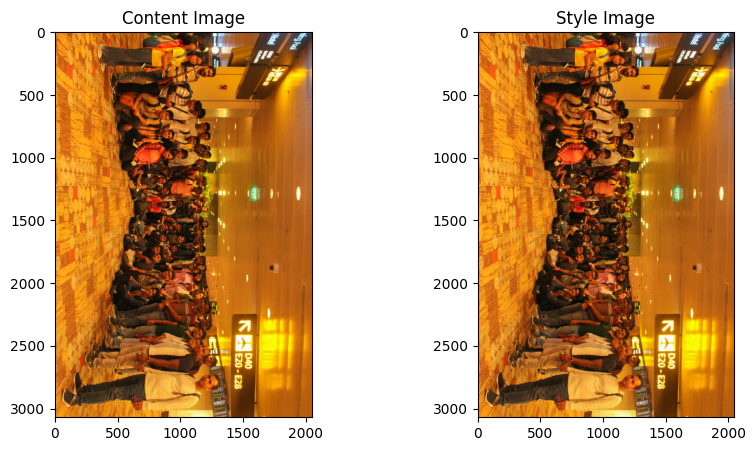

In [ ]:
# Load images
content_img_path = "1688853668562.jpg"  # Replace with the correct name
style_img_path = "1688853668562.jpg"  # Replace with the correct name

# Change the device to "cpu"
content_img = load_image(content_img_path).to("cpu")
style_img = load_image(style_img_path, shape=content_img.shape[-2:]).to("cpu")

# Display images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(im_convert(content_img))
ax1.set_title("Content Image")
ax2.imshow(im_convert(style_img))
ax2.set_title("Style Image")
plt.show()

In [ ]:
# Load pre-trained VGG model on CPU
vgg = models.vgg19(pretrained=True).features.to("cpu").eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# Load pre-trained VGG model on CPU
vgg = models.vgg19(pretrained=True).features.to("cpu").eval()

# Freeze parameters
for param in vgg.parameters():
    param.requires_grad = False

# Extract specific layers for content and style
content_layers = ['conv_4']
style_layers = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']

# Helper function to get features
def get_features(image, model):
    layers = { '0': 'conv_1', '5': 'conv_2', '10': 'conv_3',
               '19': 'conv_4', '28': 'conv_5'}
    features = {}
    x = image
    for name, layer in model._modules.items():
        x = layer(x)
        if name in layers:
            features[layers[name]] = x
    return features

# Compute Gram Matrix for style representation
def gram_matrix(tensor):
    _, d, h, w = tensor.size()
    tensor = tensor.view(d, h * w)
    gram = torch.mm(tensor, tensor.t())
    return gram

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# In cell 20, line 9:
target = content_img.clone().requires_grad_(True).to("cpu") # Change "cuda" to "cpu"


# In cell 14, change the following:
# Load pre-trained VGG model on CPU
vgg = models.vgg19(pretrained=True).features.to("cpu").eval() # Change "cuda" to "cpu"

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


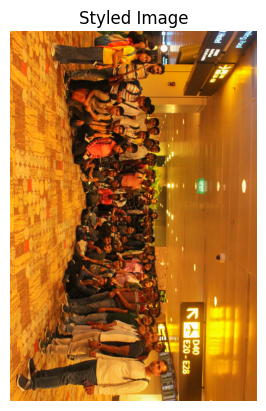

Image saved as styled_image.jpg


In [ ]:
# Display the final image
plt.imshow(im_convert(target))
plt.title("Styled Image")
plt.axis("off")
plt.show()

# Save the image
output = im_convert(target)
output_image = Image.fromarray((output * 255).astype('uint8'))
output_image.save("styled_image.jpg")
print("Image saved as styled_image.jpg")
